# Exploratory Data Analysis (EDA)

In this notebook, we will dive deep into the data, visualize patterns, identify anomalies, and gather insights.


## Setup & Data Loading

In this section, we'll set up our environment by importing necessary libraries and load the processed data for our exploratory data analysis. It's essential to ensure that our environment has all the tools required and that our data is loaded correctly before diving into the analysis.


In [1]:
# PySpark Libraries
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import *

# Visualization and Data Manipulation Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Cell_Phones_Analysis_EDA") \
    .getOrCreate()

# Load the processed data
path_to_processed_data = "/Users/ivanozono/Proyects/big-data-cellphones-analysis/data_amazon/processed"
df = spark.read.parquet(path_to_processed_data)

# Display the first few rows to confirm successful data loading
df.show(5)


23/10/30 19:13:57 WARN Utils: Your hostname, MacBook-Air-de-Ivan.local resolves to a loopback address: 127.0.0.1; using 192.168.0.10 instead (on interface en0)
23/10/30 19:13:57 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/30 19:13:57 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/10/30 19:13:59 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/10/30 19:13:59 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


+----------+-------+--------------------+-----------+--------------+---------------+--------------------+--------------+--------+-----------------+--------------+----------+-----------+---------+-----------------+------------+-----------+
|      asin|overall|          reviewText| reviewTime|    reviewerID|   reviewerName|             summary|unixReviewTime|verified|reviewText_length|summary_length|reviewDate|day_of_week|sentiment|       avg_rating|review_count|is_verified|
+----------+-------+--------------------+-----------+--------------+---------------+--------------------+--------------+--------+-----------------+--------------+----------+-----------+---------+-----------------+------------+-----------+
|1539759105|    5.0|Ron Ripley doesn'...| 12 9, 2016|A2N7K86QTR2GO2|            TDK|1 of my favorite ...|    1481241600|    true|              370|            24|2016-12-08|   Thursday| Positive|4.316666666666666|          60|          1|
|1539759105|    4.0|Loved the stories...|06 

The data has been successfully loaded into our Spark DataFrame. We've displayed the first few rows to get a quick glance at our dataset. This will be the starting point for our exploratory data analysis, ensuring that we have all the necessary columns and data transformations from our preprocessing steps.


## Basic Data Overview

Before diving deep into specific analyses, it's crucial to get a basic overview of our data. This helps in understanding the data's structure, potential patterns, or any anomalies right at the onset. In this section, we'll glance at the first few rows of our dataset and also gather some summary statistics.


In [3]:
# Display the first few rows of the dataset
df.show(5)


+----------+-------+--------------------+-----------+--------------+---------------+--------------------+--------------+--------+-----------------+--------------+----------+-----------+---------+-----------------+------------+-----------+
|      asin|overall|          reviewText| reviewTime|    reviewerID|   reviewerName|             summary|unixReviewTime|verified|reviewText_length|summary_length|reviewDate|day_of_week|sentiment|       avg_rating|review_count|is_verified|
+----------+-------+--------------------+-----------+--------------+---------------+--------------------+--------------+--------+-----------------+--------------+----------+-----------+---------+-----------------+------------+-----------+
|1539759105|    5.0|Ron Ripley doesn'...| 12 9, 2016|A2N7K86QTR2GO2|            TDK|1 of my favorite ...|    1481241600|    true|              370|            24|2016-12-08|   Thursday| Positive|4.316666666666666|          60|          1|
|1539759105|    4.0|Loved the stories...|06 

In [4]:
df.printSchema()


root
 |-- asin: string (nullable = true)
 |-- overall: double (nullable = true)
 |-- reviewText: string (nullable = true)
 |-- reviewTime: string (nullable = true)
 |-- reviewerID: string (nullable = true)
 |-- reviewerName: string (nullable = true)
 |-- summary: string (nullable = true)
 |-- unixReviewTime: long (nullable = true)
 |-- verified: boolean (nullable = true)
 |-- reviewText_length: integer (nullable = true)
 |-- summary_length: integer (nullable = true)
 |-- reviewDate: date (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- sentiment: string (nullable = true)
 |-- avg_rating: double (nullable = true)
 |-- review_count: long (nullable = true)
 |-- is_verified: integer (nullable = true)



### Describing Specific Columns

To get a clearer understanding of our data's distribution, we will focus on describing specific columns that could give us meaningful insights.

overall: This column represents the rating given by the user. By analyzing its statistics, we can determine the average rating across all products and its distribution.

reviewText_length and summary_length: These columns represent the length of the review text and summary, respectively. Analyzing these can give insights into the verbosity of the reviews and the typical length of summaries.

avg_rating: This column represents the average rating of a product. It can provide insights into the general sentiment towards products.

review_count: Indicates how many reviews a product has received. This can help us identify popular products or those that are frequently discussed.

In [5]:
numeric_cols = ['overall', 'unixReviewTime', 'reviewText_length', 'summary_length', 'avg_rating', 'review_count', 'is_verified']
df.describe(numeric_cols).show()


23/10/30 19:14:26 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+-------------------+------------------+------------------+-----------------+------------------+------------------+
|summary|           overall|     unixReviewTime| reviewText_length|    summary_length|       avg_rating|      review_count|       is_verified|
+-------+------------------+-------------------+------------------+------------------+-----------------+------------------+------------------+
|  count|          10063255|           10063255|          10063255|          10063255|         10063255|          10063255|          10063255|
|   mean| 3.933553308546787|1.440631763666607E9| 200.8255210664939| 22.52015585414461| 3.93355330854717| 809.7232556464087| 0.915197319356411|
| stddev|1.4625081608313872|5.203794105593754E7|332.96528196218543|19.117319824734555|0.621263748414617|1671.1152409295141|0.2785878563605844|
|    min|               1.0|          941328000|                 1|                 1|              1.0|                 1|                 0|

### Observations from the Summary Statistics:

1. **Overall Rating (`overall`)**:
   - The average rating across all reviews is approximately 3.93, which suggests that the majority of the reviews are positive.
   - Ratings range from a minimum of 1.0 to a maximum of 5.0, as expected.

2. **Review Time (`unixReviewTime`)**:
   - The reviews span a range of time, with the earliest review timestamp being 941,328,000 and the latest being 1,538,697,600. This information might be more interpretable if converted to human-readable dates.

3. **Review Text Length (`reviewText_length`)**:
   - On average, the review texts are around 200 characters long.
   - Some reviews are very short with just 1 character, while the longest review has 33,457 characters. This suggests a wide variety in the verbosity of reviewers.

4. **Summary Length (`summary_length`)**:
   - The average length of the summary is about 22.5 characters.
   - The summaries range from 1 character to 371 characters. Some summaries are concise, while others provide more detailed headlines.

5. **Average Rating per Product (`avg_rating`)**:
   - The mean average rating across products is approximately 3.93, which aligns with the overall rating statistics. Products, on average, tend to receive positive ratings.

6. **Review Count per Product (`review_count`)**:
   - Products receive an average of around 810 reviews.
   - Some products only have 1 review, while the most reviewed product has 13,560 reviews. This indicates varying popularity and discussion levels for different products.

7. **Verification Status (`is_verified`)**:
   - About 91.5% of the reviews are verified, suggesting that the majority of reviews come from verified purchases.

These statistics provide a comprehensive overview of the dataset and set the foundation for further exploratory and analytical work.


### Distribution of Ratings

Understanding the distribution of ratings can provide insights into the overall sentiment of the reviews. Let's visualize the distribution of ratings in the `overall` column to see how users generally rate the products.


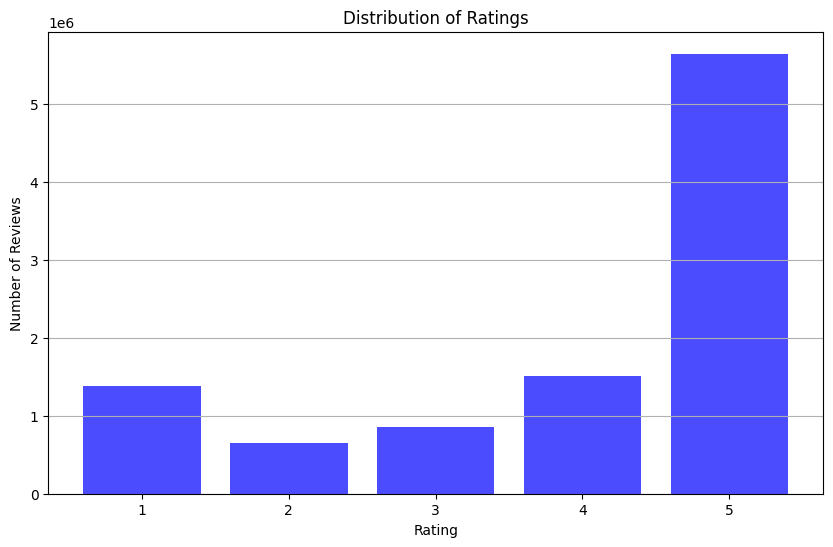

In [9]:
# Step 1: Aggregation in Spark
# Group by the "overall" column and count the number of reviews for each rating
ratings_distribution = df.groupBy("overall").count().collect()

# Extract ratings and their respective counts
ratings = [row['overall'] for row in ratings_distribution]
counts = [row['count'] for row in ratings_distribution]

# Step 2: Visualization using Matplotlib
import matplotlib.pyplot as plt

# Set up the figure and axis for the plot
plt.figure(figsize=(10,6))

# Create a bar chart to display the distribution of ratings
plt.bar(ratings, counts, color='blue', alpha=0.7)

# Label the x and y axes and set the title
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings')

# Set the ticks on the x-axis to match the unique ratings
plt.xticks(ratings)

# Add a grid on the y-axis for better readability
plt.grid(axis='y')

# Display the plot
plt.show()


#### Observations: 

5-Star Ratings: This is the most common rating, indicating that a majority of users are satisfied with their purchases. The height of the bar corresponding to 5 stars is the tallest, suggesting high customer satisfaction.

1 to 4-Star Ratings: These bars are notably shorter than the 5-star rating bar, indicating fewer reviews with these ratings. 

Trends: As the ratings decrease from 5 to 1, there's generally a trend of increasing frequencies, suggesting that products either get very positive reviews or very negative ones, with fewer in-between ratings.